In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import pandas as pd

file_name = '/content/drive/My Drive/新生訓練/新訓HW1/sales_train.csv'
data = pd.read_csv(file_name, encoding='utf-8', engine='python')


               date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0        02.01.2013               0       59    22154      999.00           1.0
1        03.01.2013               0       25     2552      899.00           1.0
2        05.01.2013               0       25     2552      899.00          -1.0
3        06.01.2013               0       25     2554     1709.05           1.0
4        15.01.2013               0       25     2555     1099.00           1.0
...             ...             ...      ...      ...         ...           ...
2935844  10.10.2015              33       25     7409      299.00           1.0
2935845  09.10.2015              33       25     7460      299.00           1.0
2935846  14.10.2015              33       25     7459      349.00           1.0
2935847  22.10.2015              33       25     7440      299.00           1.0
2935848  03.10.2015              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]


In [45]:
data = data.drop("date", axis = 1) # 刪除date欄位
print(data)

         date_block_num  shop_id  item_id  item_price  item_cnt_day
0                     0       59    22154      999.00           1.0
1                     0       25     2552      899.00           1.0
2                     0       25     2552      899.00          -1.0
3                     0       25     2554     1709.05           1.0
4                     0       25     2555     1099.00           1.0
...                 ...      ...      ...         ...           ...
2935844              33       25     7409      299.00           1.0
2935845              33       25     7460      299.00           1.0
2935846              33       25     7459      349.00           1.0
2935847              33       25     7440      299.00           1.0
2935848              33       25     7460      299.00           1.0

[2935849 rows x 5 columns]


In [46]:
file_name = '/content/drive/My Drive/新生訓練/新訓HW1/items.csv'
items_data = pd.read_csv(file_name, encoding='utf-8', engine='python')

In [48]:
item_category = []  # 在train.csv中加入item_category這個feature
for i in range(len(data)):
  if(i%10000==0):
    print(i)
  filter = (items_data["item_id"] == data['item_id'][i])
  item_category.append(items_data[filter]['item_category_id'].values[0])
data['item_category_id'] = item_category

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data.to_csv('/content/drive/My Drive/新生訓練/新訓HW1/plus_item_category.csv',index=False , encoding='utf-8')

In [121]:
temp = data.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).item_cnt_day.sum()
print(temp)


         date_block_num  shop_id  item_id  item_cnt_day
0                     0        0       32           6.0
1                     0        0       33           3.0
2                     0        0       35           1.0
3                     0        0       43           1.0
4                     0        0       51           2.0
...                 ...      ...      ...           ...
1609119              33       59    22087           6.0
1609120              33       59    22088           2.0
1609121              33       59    22091           1.0
1609122              33       59    22100           1.0
1609123              33       59    22102           1.0

[1609124 rows x 4 columns]


In [122]:
print(temp.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], dtype='object')


In [123]:
for i in range(len(temp)):
  if(i%10000==0):
    print(i)
  filter = (items_data["item_id"] == temp['item_id'][i])
  item_category.append(items_data[filter]['item_category_id'].values[0])


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

ValueError: ignored

In [124]:
temp['item_category_id'] = item_category[2935849:]

In [126]:
print(temp)

         date_block_num  shop_id  item_id  item_cnt_day  item_category_id
0                     0        0       32           6.0                40
1                     0        0       33           3.0                37
2                     0        0       35           1.0                40
3                     0        0       43           1.0                40
4                     0        0       51           2.0                57
...                 ...      ...      ...           ...               ...
1609119              33       59    22087           6.0                83
1609120              33       59    22088           2.0                83
1609121              33       59    22091           1.0                83
1609122              33       59    22100           1.0                42
1609123              33       59    22102           1.0                42

[1609124 rows x 5 columns]


In [125]:
temp.to_csv('/content/drive/My Drive/新生訓練/新訓HW1/GT.csv',index=False , encoding='utf-8')

# 對GT.csv作圖

In [127]:
file_name = '/content/drive/My Drive/新生訓練/新訓HW1/GT.csv'
data = pd.read_csv(file_name, encoding='utf-8', engine='python')
print(data)

         date_block_num  shop_id  item_id  item_cnt_day  item_category_id
0                     0        0       32           6.0                40
1                     0        0       33           3.0                37
2                     0        0       35           1.0                40
3                     0        0       43           1.0                40
4                     0        0       51           2.0                57
...                 ...      ...      ...           ...               ...
1609119              33       59    22087           6.0                83
1609120              33       59    22088           2.0                83
1609121              33       59    22091           1.0                83
1609122              33       59    22100           1.0                42
1609123              33       59    22102           1.0                42

[1609124 rows x 5 columns]


In [146]:
temp = data.groupby('date_block_num', as_index=False).item_cnt_day.mean()
print(temp)

    date_block_num  item_cnt_day
0                0      2.079574
1                1      2.137149
2                2      2.299920
3                3      1.961821
4                4      2.007092
5                5      2.231137
6                6      2.015439
7                7      2.159371
8                8      2.585206
9                9      2.496399
10              10      2.526409
11              11      2.766341
12              12      2.192404
13              13      2.299325
14              14      2.339109
15              15      2.158158
16              16      2.136739
17              17      2.096104
18              18      1.994930
19              19      2.211955
20              20      2.454246
21              21      2.521939
22              22      2.575566
23              23      2.846984
24              24      2.372443
25              25      2.034259
26              26      2.026839
27              27      2.367361
28              28      2.243793
29        

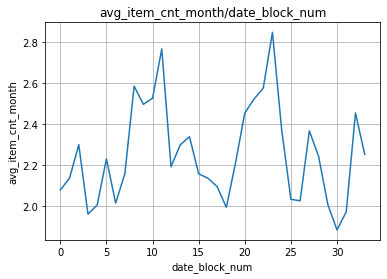

In [147]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_value = 'date_block_num'
ax.plot(temp['date_block_num'], temp['item_cnt_day'])
ax.set(xlabel=x_value, ylabel='avg_item_cnt_month',
       title='avg_item_cnt_month/'+x_value)
ax.grid()

fig.savefig("test.png")
plt.show()

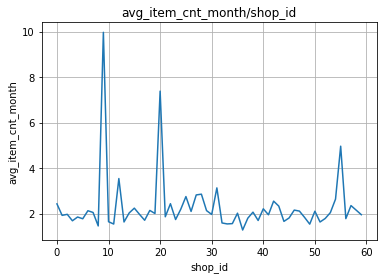

In [148]:
x_value = 'shop_id'
temp = data.groupby(x_value, as_index=False).item_cnt_day.mean()
fig, ax = plt.subplots()

ax.plot(temp['shop_id'], temp['item_cnt_day'])
ax.set(xlabel=x_value, ylabel='avg_item_cnt_month',
       title='avg_item_cnt_month/'+x_value)
ax.grid()

fig.savefig("test.png")
plt.show()

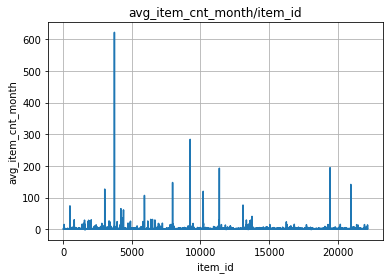

In [149]:
x_value = 'item_id'
temp = data.groupby(x_value, as_index=False).item_cnt_day.mean()
fig, ax = plt.subplots()
ax.plot(temp['item_id'], temp['item_cnt_day'])
ax.set(xlabel=x_value, ylabel='avg_item_cnt_month',
       title='avg_item_cnt_month/'+x_value)
ax.grid()

fig.savefig("test.png")
plt.show()

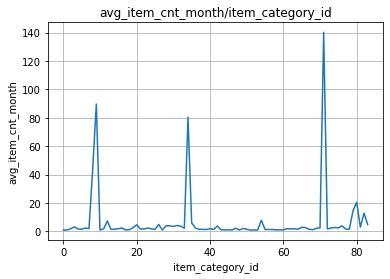

In [150]:
x_value = 'item_category_id'
temp = data.groupby(x_value, as_index=False).item_cnt_day.mean()
fig, ax = plt.subplots()
ax.plot(temp['item_category_id'], temp['item_cnt_day'])
ax.set(xlabel=x_value, ylabel='avg_item_cnt_month',
       title='avg_item_cnt_month/'+x_value)
ax.grid()

fig.savefig("test.png")
plt.show()

# 對plus_item_category作圖

In [2]:
import pandas as pd
file_name = '/content/drive/My Drive/新生訓練/新訓HW1/plus_item_category.csv'
data = pd.read_csv(file_name, encoding='utf-8', engine='python')
print(data)

         date_block_num  shop_id  ...  item_cnt_day  item_category_id
0                     0       59  ...           1.0                37
1                     0       25  ...           1.0                58
2                     0       25  ...          -1.0                58
3                     0       25  ...           1.0                58
4                     0       25  ...           1.0                56
...                 ...      ...  ...           ...               ...
2935844              33       25  ...           1.0                55
2935845              33       25  ...           1.0                55
2935846              33       25  ...           1.0                55
2935847              33       25  ...           1.0                57
2935848              33       25  ...           1.0                55

[2935849 rows x 6 columns]


In [152]:
print(data.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_category_id'],
      dtype='object')


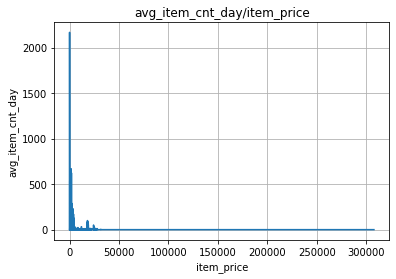

In [4]:
import matplotlib.pyplot as plt
emp = data.groupby('item_price', as_index=False).item_cnt_day.mean()
fig, ax = plt.subplots()
ax.plot(temp['item_price'], temp['item_cnt_day'])
ax.set(xlabel='item_price', ylabel='avg_item_cnt_day',
       title='avg_item_cnt_day/'+'item_price')
ax.grid()

fig.savefig("test.png")
plt.show()